# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

# Task 2:

---

## Clean and Transform data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Although transferring to thi...
1,✅ Trip Verified | We are extremely grateful ...
2,✅ Trip Verified | I had an appalling experie...
3,"Not Verified | Good points, the cabin crew, t..."
4,"Not Verified | It was a decent flight, reason..."


In [4]:
df.to_csv("./BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Task 2: Data Cleaning and Transforming
---

In [5]:
import csv
import pandas as pd

# Initialize lists
fields = []
rows = []

# Open the CSV file properly
with open('BA_reviews.csv', 'r', newline='', encoding='utf-8') as csv_f:
    csv_reader = csv.reader(csv_f)  # Correct usage
    fields = next(csv_reader)  # Extract headers

    # Collect row data
    for row in csv_reader:
        rows.append(row)

# Print total row count
print(f"Total number of rows: {len(rows)}")

# Print field names
print(f"Field names: {', '.join(fields)}")

# Convert to DataFrame
df = pd.DataFrame(rows, columns=fields)

# Remove missing values
df = df.dropna()

#handle missing value 
df.fillna("Unknown", inplace=True)  # Fill blanks with a default value

#Remove the duplicate data
df.drop_duplicates(inplace=True)


# Remove "Trip verified" from reviews column
df["reviews"] = df["reviews"].str.replace("Trip Verified", "", regex=False)

# Show first few rows
df.head()

#explore the trend: 
df["Not Verified"] = df["reviews"].apply(lambda x: "Not Verified" in x)
print(df.groupby("Not Verified").size())  # Counts Not Verified & Verified reviews


Total number of rows: 1000
Field names: , reviews
Not Verified
False    741
True     259
dtype: int64


# Explaination: 
---
False means: total number of Verified Feedback
True means: total number of Not Verified Feedback

In [13]:
#Filter data that contains "Not Verified"
filtered_df = df[df["reviews"].str.contains("Not Verified", na=False)]
filtered_df.head()



,,reviews,Not Verified,sentiment
3,3,"Not Verified | Good points, the cabin crew, t...",True,0.048286
4,4,"Not Verified | It was a decent flight, reason...",True,0.143864
13,13,Not Verified | LHR T5 BA Gold Wing worked wel...,True,0.402794
14,14,Not Verified | Very good service on this rout...,True,-0.120648
28,28,Not Verified | Very good flight following an ...,True,0.344286


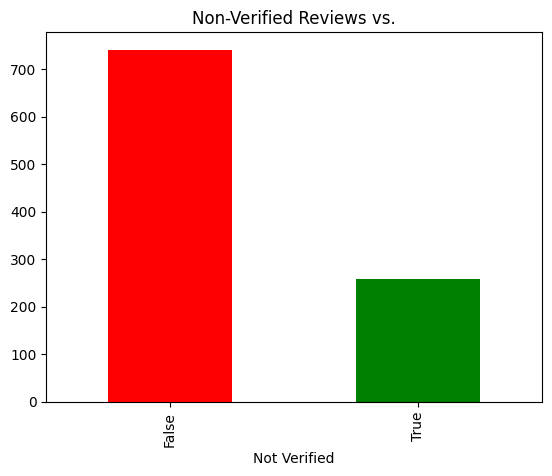

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Bar chart for Verifield vs. Not Verified
df.groupby("Not Verified").size().plot(kind="bar", color=["red", "green"])
plt.title("Non-Verified Reviews vs.")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#install libraries: pip install textblob matplotlib seaborn
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

#compute sentiment scores
# Calculate sentiment polarity (-1 = negative, 1 = positive)
df["sentiment"] = df["reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display first few sentiment scores
print(df[["reviews", "sentiment"]].head())


                                             reviews  sentiment
0  ✅  | Although transferring to this flight thro...   0.297500
1  ✅  |   We are extremely grateful to the crew o...   0.058750
2  ✅  |   I had an appalling experience with Brit...  -0.056573
3  Not Verified |  Good points, the cabin crew, t...   0.048286
4  Not Verified |  It was a decent flight, reason...   0.143864


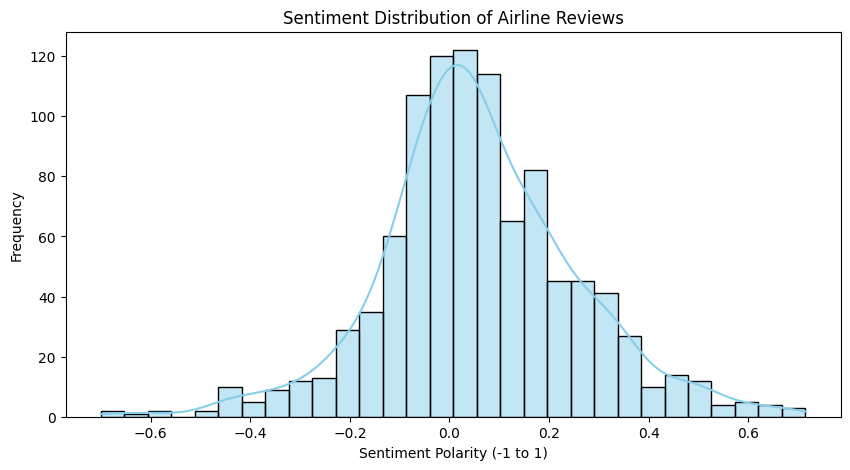

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df["sentiment"], bins=30, kde=True, color="skyblue")

plt.xlabel("Sentiment Polarity (-1 to 1)")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Airline Reviews")
plt.show()


- Negative reviews (polarity < 0) suggest dissatisfaction.
- Neutral reviews (around 0) indicate mixed feedback.
- Positive reviews (> 0) suggest customer satisfaction.

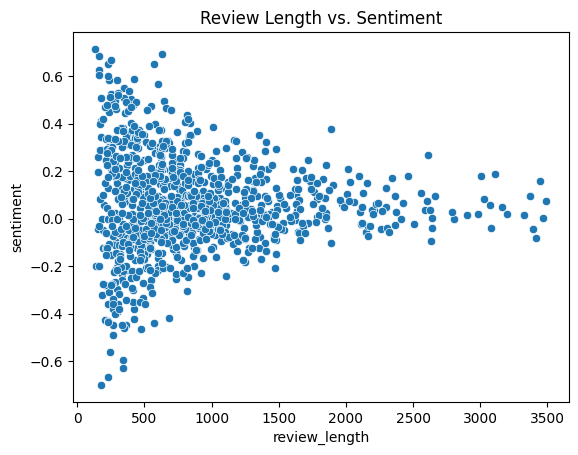

In [17]:
df["review_length"] = df["reviews"].str.len()
sns.scatterplot(x=df["review_length"], y=df["sentiment"])
plt.title("Review Length vs. Sentiment")
plt.show()


 Do longer review tend to have more positive feedback?
- People tend to write longer neutral and positive feedback than negative feedback. 